<a href="https://colab.research.google.com/github/Amankr351/Play-Store-Review-Analysis/blob/main/Aman_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Play Store Review Analysis...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing all the required libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Play Store Data.csv', encoding = 'ISO-8859-1')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data preparation and cleaning



In [4]:
data.shape   #The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

(10841, 13)

In [5]:
data.info()   #The info() method prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()  #To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data['Type'].fillna('Free', inplace = True)               #After filling the value we can check and see if that has been correctly placed.
data['Content Rating'].fillna('Everyone', inplace = True)

In [8]:
data['Rating'].fillna(data['Rating'].mode()[0], inplace = True)

In [9]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [10]:
data.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)   #We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.

In [11]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

In [12]:
data.describe()   #The describe() method returns description of the data in the DataFrame.

,Rating
count,10841.000000
mean,4.221437
std,0.504555
min,1.000000
25%,4.100000
50%,4.400000
75%,4.500000
max,19.000000


##Exploratory analysis and visulization

###Top categories on Google Playstore?

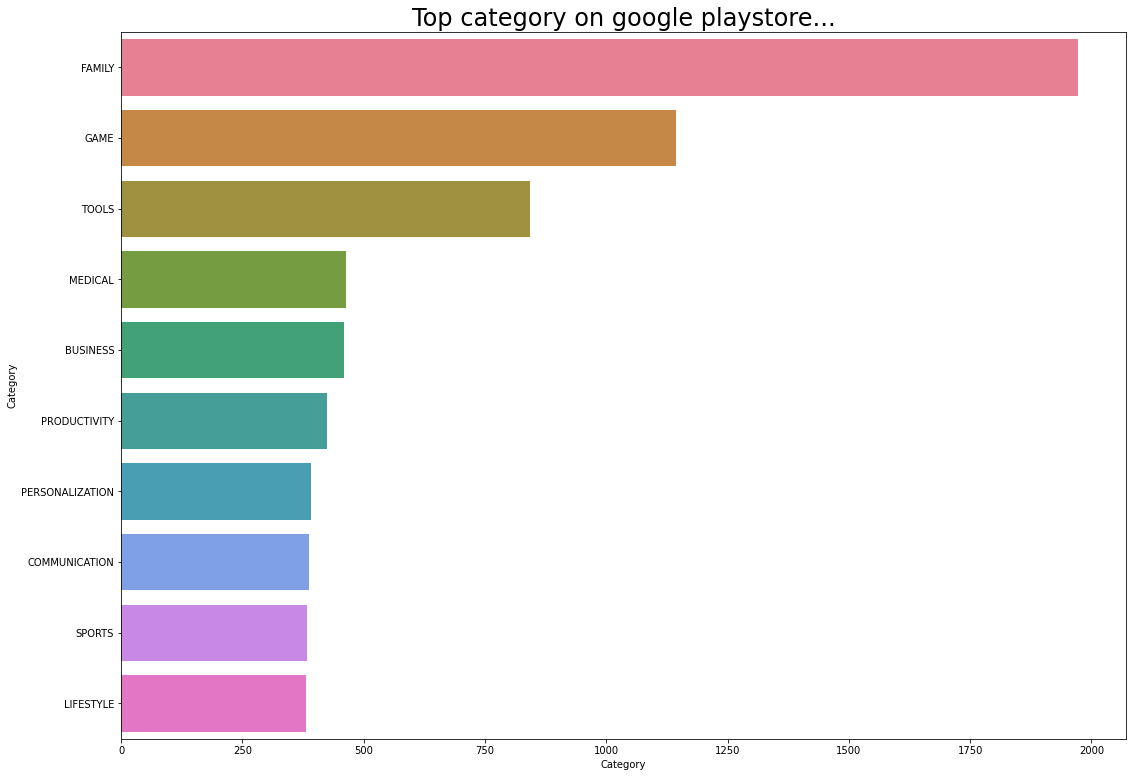

In [38]:
y = data['Category'].value_counts().index
x =  data['Category'].value_counts()

plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")
sns.barplot(x=x[0:10],y=y[0:10], palette='husl')
plt.title("Top category on google playstore...", fontsize = 24);

###Which category of Apps from the ‘Content Rating’ column is found more on the play store?

In [14]:
x2 = data['Content Rating'].value_counts().index
y2 = data['Content Rating'].value_counts()

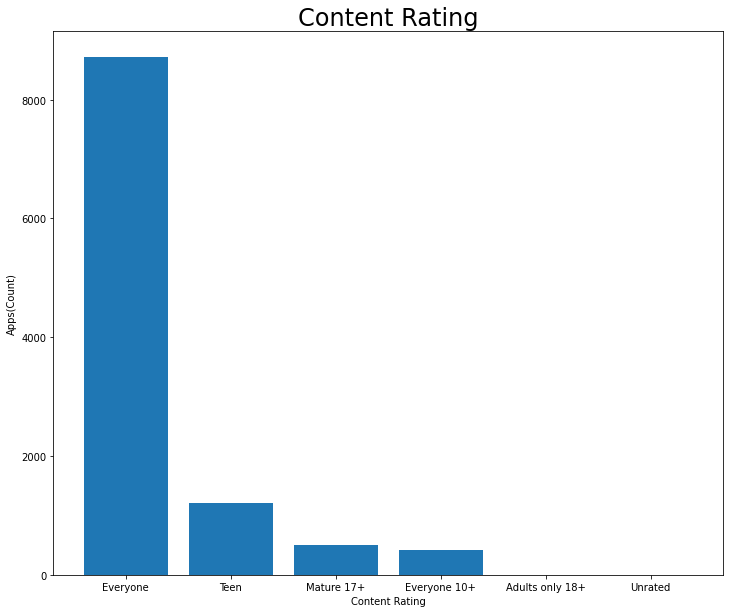

In [36]:
plt.figure(figsize=(12,10))
plt.bar(x2, y2, width =0.8)
plt.ylabel('Apps(Count)')
plt.xlabel('Content Rating')
plt.title('Content Rating', size = 24);

###What percentage of apps are Free and Paid?

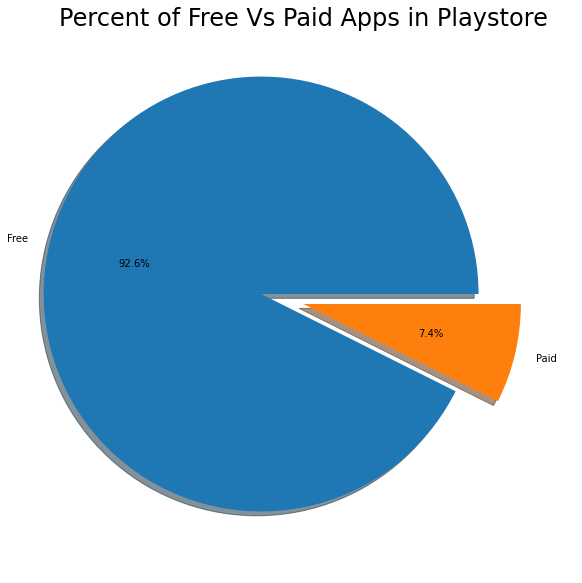

In [35]:
plt.figure(figsize=(10,10))
labels = data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)
myexplode = [0.2, 0]
plt.pie(sizes,  labels=labels, explode =myexplode, autopct='%1.1f%%', shadow=True)
plt.title('Percent of Free Vs Paid Apps in Playstore', size = 24);

###Distribution of the ratings of the apps?

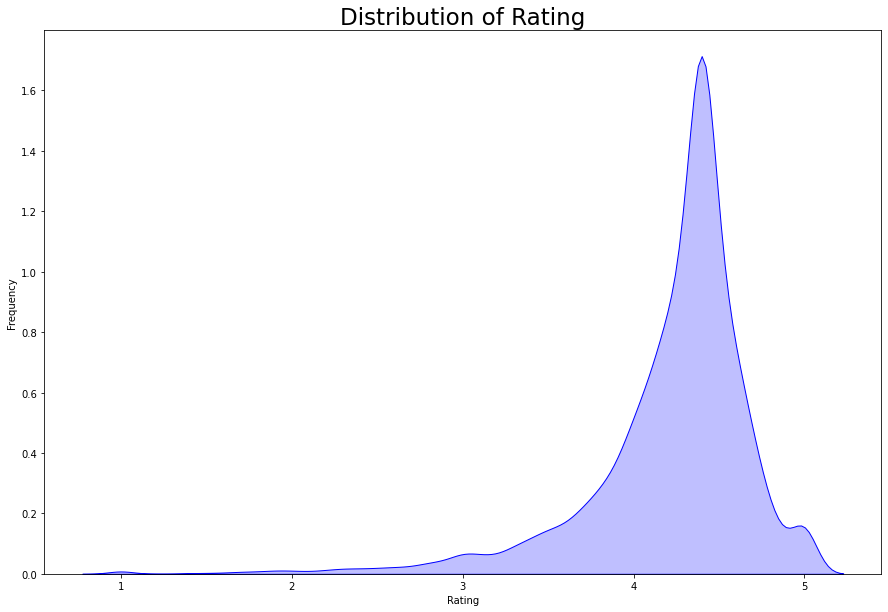

In [30]:
plt.figure(figsize=(15,10))
plt.xlabel('Rating')
plt.ylabel('Frequency')
sns.kdeplot(data.Rating, color= 'Blue', shade=True)
plt.title('Distribution of Rating', size = 23);

In [18]:
data.drop([10472], axis=0, inplace=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


###Which category of apps has the most number of installs?

In [19]:
data['Installs'] = data.Installs.apply(lambda x: x.strip('+'))
data['Installs'] = data.Installs.apply(lambda x: x.replace(',', ''))
data['Installs'] = pd.to_numeric(data['Installs'])

In [20]:
highest_Installs_df = data.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
highest_Installs_df

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915
FAMILY,10258263505
PHOTOGRAPHY,10088247655
NEWS_AND_MAGAZINES,7496317760
TRAVEL_AND_LOCAL,6868887146


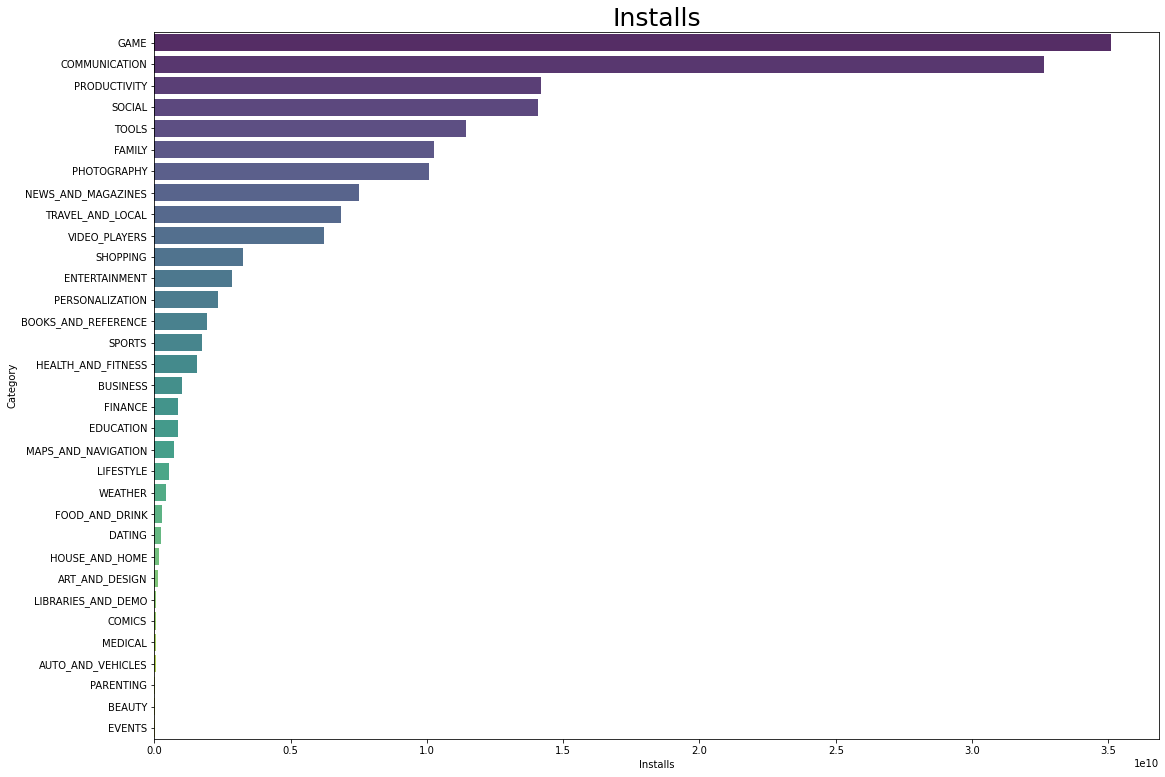

In [29]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
plt.title("Installs", fontsize = 25);

###What are the Top 10 installed apps in family categories?

In [24]:
group = data.groupby('Category')
top_10 = group.get_group('FAMILY')

In [25]:
top_10_app = top_10.sort_values(by='Installs', ascending=False).head(10)

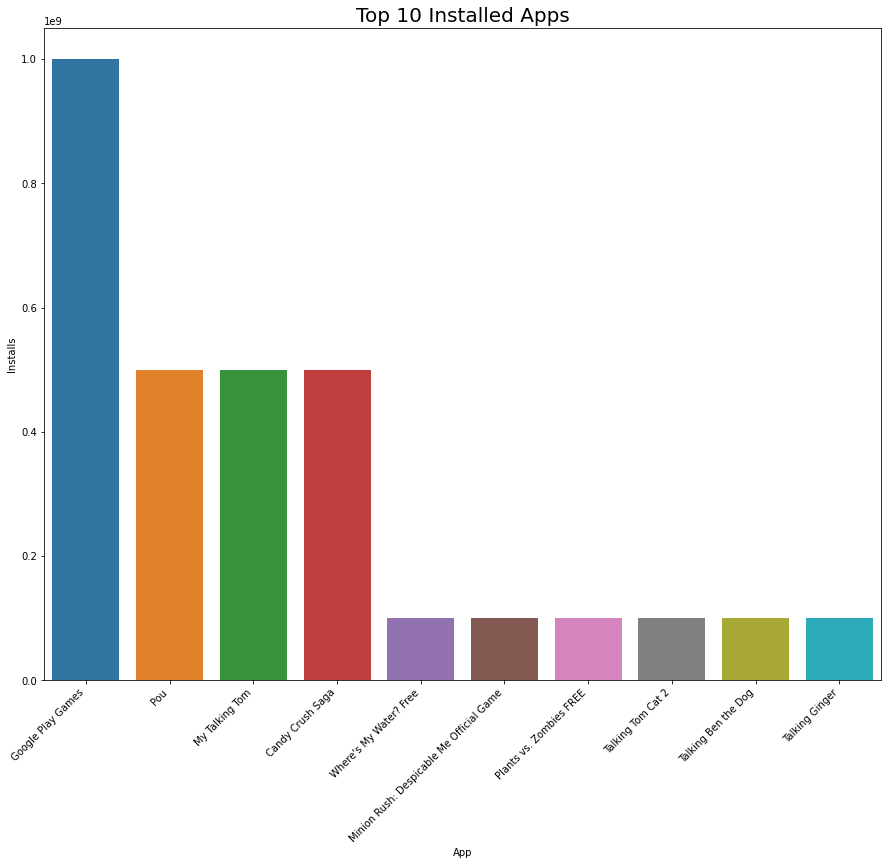

In [28]:
 plt.figure(figsize=(15,12))
 plt.title('Top 10 Installed Apps',size = 20)    
 graph = sns.barplot(x = top_10_app.App, y = top_10_app.Installs)
 graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

###Which are the top expensive Apps?

In [39]:
top10PaidApps = data[data['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)

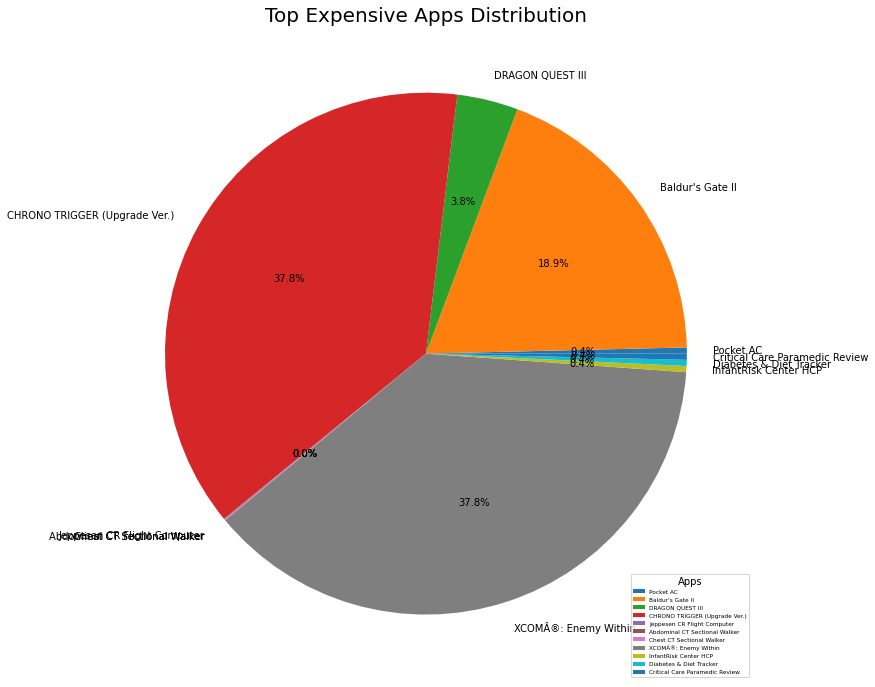

In [40]:
plt.figure(figsize=(15,12));
plt.pie(top10PaidApps.Installs, explode=None, labels=top10PaidApps.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );